In [1]:
#Importando as bibliotecas 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Abrir o conjunto de dados
df = pd.read_csv('car_price_prediction.csv', sep = ',')

In [3]:
#Espiando os dados
df.head()

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4


In [4]:
#Verificando valores nulos
df.isnull().sum()

ID                  0
Price               0
Levy                0
Manufacturer        0
Model               0
Prod. year          0
Category            0
Leather interior    0
Fuel type           0
Engine volume       0
Mileage             0
Cylinders           0
Gear box type       0
Drive wheels        0
Doors               0
Wheel               0
Color               0
Airbags             0
dtype: int64

In [5]:
df.shape

(19237, 18)

In [6]:
#Lista das colunas 
df.columns

Index(['ID', 'Price', 'Levy', 'Manufacturer', 'Model', 'Prod. year',
       'Category', 'Leather interior', 'Fuel type', 'Engine volume', 'Mileage',
       'Cylinders', 'Gear box type', 'Drive wheels', 'Doors', 'Wheel', 'Color',
       'Airbags'],
      dtype='object')

In [7]:
#Coluna "Levy" apresenta dados - . Será tratado abaixo:
df[(df['Levy'] == '-')]['Levy']

2        -
9        -
11       -
12       -
23       -
        ..
19223    -
19224    -
19226    -
19229    -
19232    -
Name: Levy, Length: 5819, dtype: object

In [8]:
df.iloc[:,2] = np.where(df.iloc[:,2] == '-', 0, df.iloc[:,2] )

df.iloc[:,2]

0        1399
1        1018
2           0
3         862
4         446
         ... 
19232       0
19233     831
19234     836
19235    1288
19236     753
Name: Levy, Length: 19237, dtype: object

In [9]:
#Separando o km do númeral ( km rodados)
df[['Mileage','teste5']] = df['Mileage'].str.split(n = 1, expand = True)


In [10]:
df.drop('teste5', axis = 1, inplace = True)

In [11]:
df.head(5)

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,0,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901,4.0,Automatic,Front,04-May,Left wheel,Silver,4


In [12]:
df['Gear box type'].value_counts()

Automatic    13514
Tiptronic     3102
Manual        1875
Variator       746
Name: Gear box type, dtype: int64

In [13]:
#Ajuste da variável Gear Box type
automatic = ['Automatic','Tiptronic','Tiptronic']

In [14]:
df['Gear box type'] = np.where(np.isin(df.iloc[:,12],automatic),"Automatic","Manual")

In [15]:
df['Gear box type'].value_counts() 

Automatic    16616
Manual        2621
Name: Gear box type, dtype: int64

In [16]:
#Ajuste da variável Color
round(df['Color'].value_counts(normalize = True) *100,2)

Black            26.16
White            23.34
Silver           19.71
Grey             12.35
Blue              7.26
Red               3.32
Green             1.67
Orange            1.32
Brown             0.97
Carnelian red     0.93
Golden            0.75
Beige             0.70
Sky blue          0.63
Yellow            0.55
Purple            0.20
Pink              0.14
Name: Color, dtype: float64

In [17]:
cores = ['Black','White','Silver','Grey','Blue']

In [18]:
df['Color'] = np.where(np.isin(df.iloc[:,16],cores),df.iloc[:,16],'Other Colors')

In [19]:
round(df['Color'].value_counts(normalize = True) *100,2)

Black           26.16
White           23.34
Silver          19.71
Grey            12.35
Other Colors    11.19
Blue             7.26
Name: Color, dtype: float64

In [20]:
#Ajuste da variável Cylinders
df['Engine volume'].unique()

array(['3.5', '3', '1.3', '2.5', '2', '1.8', '2.4', '4', '1.6', '3.3',
       '2.0 Turbo', '2.2 Turbo', '4.7', '1.5', '4.4', '3.0 Turbo',
       '1.4 Turbo', '3.6', '2.3', '1.5 Turbo', '1.6 Turbo', '2.2',
       '2.3 Turbo', '1.4', '5.5', '2.8 Turbo', '3.2', '3.8', '4.6', '1.2',
       '5', '1.7', '2.9', '0.5', '1.8 Turbo', '2.4 Turbo', '3.5 Turbo',
       '1.9', '2.7', '4.8', '5.3', '0.4', '2.8', '3.2 Turbo', '1.1',
       '2.1', '0.7', '5.4', '1.3 Turbo', '3.7', '1', '2.5 Turbo', '2.6',
       '1.9 Turbo', '4.4 Turbo', '4.7 Turbo', '0.8', '0.2 Turbo', '5.7',
       '4.8 Turbo', '4.6 Turbo', '6.7', '6.2', '1.2 Turbo', '3.4',
       '1.7 Turbo', '6.3 Turbo', '2.7 Turbo', '4.3', '4.2', '2.9 Turbo',
       '0', '4.0 Turbo', '20', '3.6 Turbo', '0.3', '3.7 Turbo', '5.9',
       '5.5 Turbo', '0.2', '2.1 Turbo', '5.6', '6', '0.7 Turbo',
       '0.6 Turbo', '6.8', '4.5', '0.6', '7.3', '0.1', '1.0 Turbo', '6.3',
       '4.5 Turbo', '0.8 Turbo', '4.2 Turbo', '3.1', '5.0 Turbo', '6.4',
       '3

In [21]:
#Agrupamento da variável mileage
faixa_bins = [0,25000,50000,75000,100000,125000,999990]
label_faixas = ["0k a 25k","25k a 50k","50k a 75k","75k a 100k","100k a 125k","Acima 125k"]



In [22]:
#Transformação do tipo da variável Mileage de str para int , para utilizar a função cut do Pandas
df['Mileage'] = df['Mileage'].astype(str).astype(int)

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19237 entries, 0 to 19236
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                19237 non-null  int64  
 1   Price             19237 non-null  int64  
 2   Levy              19237 non-null  object 
 3   Manufacturer      19237 non-null  object 
 4   Model             19237 non-null  object 
 5   Prod. year        19237 non-null  int64  
 6   Category          19237 non-null  object 
 7   Leather interior  19237 non-null  object 
 8   Fuel type         19237 non-null  object 
 9   Engine volume     19237 non-null  object 
 10  Mileage           19237 non-null  int32  
 11  Cylinders         19237 non-null  float64
 12  Gear box type     19237 non-null  object 
 13  Drive wheels      19237 non-null  object 
 14  Doors             19237 non-null  object 
 15  Wheel             19237 non-null  object 
 16  Color             19237 non-null  object

In [24]:
df['Car Status'] = pd.cut(df.Mileage, bins = faixa_bins, labels = label_faixas, right = False)

In [25]:
df['Car Status'].value_counts()

Acima 125k     9668
100k a 125k    2431
0k a 25k       1895
50k a 75k      1887
75k a 100k     1871
25k a 50k      1407
Name: Car Status, dtype: int64

In [26]:
#Ajuste da variável Fuel Type
round(df['Fuel type'].value_counts(normalize = True) *100,2)

Petrol            52.76
Diesel            20.98
Hybrid            18.60
LPG                4.64
CNG                2.57
Plug-in Hybrid     0.45
Hydrogen           0.01
Name: Fuel type, dtype: float64

In [27]:
combustivel = ['Petrol','Diesel','Hybrid']

In [28]:
df['Fuel type'] = np.where(np.isin(df.iloc[:,8],combustivel),df.iloc[:,8],'Other Fuels')

In [29]:
df['Fuel type'].value_counts()

Petrol         10150
Diesel          4036
Hybrid          3578
Other Fuels     1473
Name: Fuel type, dtype: int64

In [30]:
df.head(5)

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags,Car Status
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005,6.0,Automatic,4x4,04-May,Left wheel,Silver,12,Acima 125k
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000,6.0,Automatic,4x4,04-May,Left wheel,Black,8,Acima 125k
2,45774419,8467,0,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000,4.0,Manual,Front,04-May,Right-hand drive,Black,2,Acima 125k
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966,4.0,Automatic,4x4,04-May,Left wheel,White,0,Acima 125k
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901,4.0,Automatic,Front,04-May,Left wheel,Silver,4,75k a 100k


In [31]:
df['Car Status'].isnull().sum()

78

In [32]:
df.dropna(subset = 'Car Status', inplace = True)

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19159 entries, 0 to 19236
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   ID                19159 non-null  int64   
 1   Price             19159 non-null  int64   
 2   Levy              19159 non-null  object  
 3   Manufacturer      19159 non-null  object  
 4   Model             19159 non-null  object  
 5   Prod. year        19159 non-null  int64   
 6   Category          19159 non-null  object  
 7   Leather interior  19159 non-null  object  
 8   Fuel type         19159 non-null  object  
 9   Engine volume     19159 non-null  object  
 10  Mileage           19159 non-null  int32   
 11  Cylinders         19159 non-null  float64 
 12  Gear box type     19159 non-null  object  
 13  Drive wheels      19159 non-null  object  
 14  Doors             19159 non-null  object  
 15  Wheel             19159 non-null  object  
 16  Color             1915

In [34]:
df.Price.describe()

count    1.915900e+04
mean     1.859807e+04
std      1.909673e+05
min      1.000000e+00
25%      5.331000e+03
50%      1.317200e+04
75%      2.226600e+04
max      2.630750e+07
Name: Price, dtype: float64

In [35]:
limite_superior = 150000
print("Valor superior:" , limite_superior)
limite_inferior = 8000
print("Valor inferior:", limite_inferior)

Valor superior: 150000
Valor inferior: 8000


In [36]:
df = df[(df.Price < limite_superior) & (df.Price > limite_inferior)]

In [37]:
df[(df.Mileage < 300000)].count() / df.Mileage.count()

ID                  0.95029
Price               0.95029
Levy                0.95029
Manufacturer        0.95029
Model               0.95029
Prod. year          0.95029
Category            0.95029
Leather interior    0.95029
Fuel type           0.95029
Engine volume       0.95029
Mileage             0.95029
Cylinders           0.95029
Gear box type       0.95029
Drive wheels        0.95029
Doors               0.95029
Wheel               0.95029
Color               0.95029
Airbags             0.95029
Car Status          0.95029
dtype: float64

In [38]:
km_superior =  225000

In [39]:
km_superior

225000

In [40]:
df = df[(df.Mileage < km_superior)]

In [41]:
df

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags,Car Status
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005,6.0,Automatic,4x4,04-May,Left wheel,Silver,12,Acima 125k
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000,6.0,Automatic,4x4,04-May,Left wheel,Black,8,Acima 125k
2,45774419,8467,0,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000,4.0,Manual,Front,04-May,Right-hand drive,Black,2,Acima 125k
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901,4.0,Automatic,Front,04-May,Left wheel,Silver,4,75k a 100k
5,45802912,39493,891,HYUNDAI,Santa FE,2016,Jeep,Yes,Diesel,2,160931,4.0,Automatic,Front,04-May,Left wheel,White,4,Acima 125k
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19223,44571028,8781,0,DODGE,Caliber,2008,Hatchback,No,Petrol,2.4,0,4.0,Automatic,Front,04-May,Left wheel,Blue,4,0k a 25k
19224,45768089,19130,0,KIA,Optima ex,2014,Sedan,Yes,Petrol,2.4,35800,4.0,Automatic,Front,04-May,Left wheel,Black,12,25k a 50k
19227,45769427,29793,1053,MERCEDES-BENZ,E 350,2014,Sedan,Yes,Diesel,3.5,219030,6.0,Automatic,4x4,04-May,Left wheel,Black,12,Acima 125k
19233,45778856,15681,831,HYUNDAI,Sonata,2011,Sedan,Yes,Petrol,2.4,161600,4.0,Automatic,Front,04-May,Left wheel,Other Colors,8,Acima 125k


In [42]:
df.Mileage.max()

224863

<AxesSubplot:xlabel='Prod. year', ylabel='Count'>

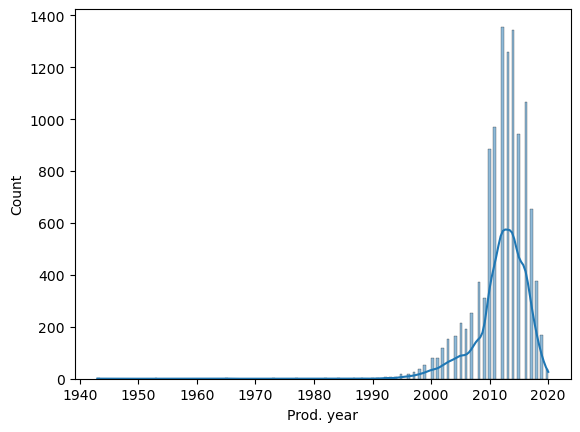

In [43]:
sns.histplot(x = df['Prod. year'], kde = True)

In [44]:
df[(df['Prod. year'] >1995 )].count() 

ID                  11130
Price               11130
Levy                11130
Manufacturer        11130
Model               11130
Prod. year          11130
Category            11130
Leather interior    11130
Fuel type           11130
Engine volume       11130
Mileage             11130
Cylinders           11130
Gear box type       11130
Drive wheels        11130
Doors               11130
Wheel               11130
Color               11130
Airbags             11130
Car Status          11130
dtype: int64

In [45]:
limite_year = 1995

In [46]:
df = df[(df['Prod. year'] > limite_year)]

In [47]:
df

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags,Car Status
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005,6.0,Automatic,4x4,04-May,Left wheel,Silver,12,Acima 125k
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000,6.0,Automatic,4x4,04-May,Left wheel,Black,8,Acima 125k
2,45774419,8467,0,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000,4.0,Manual,Front,04-May,Right-hand drive,Black,2,Acima 125k
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901,4.0,Automatic,Front,04-May,Left wheel,Silver,4,75k a 100k
5,45802912,39493,891,HYUNDAI,Santa FE,2016,Jeep,Yes,Diesel,2,160931,4.0,Automatic,Front,04-May,Left wheel,White,4,Acima 125k
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19223,44571028,8781,0,DODGE,Caliber,2008,Hatchback,No,Petrol,2.4,0,4.0,Automatic,Front,04-May,Left wheel,Blue,4,0k a 25k
19224,45768089,19130,0,KIA,Optima ex,2014,Sedan,Yes,Petrol,2.4,35800,4.0,Automatic,Front,04-May,Left wheel,Black,12,25k a 50k
19227,45769427,29793,1053,MERCEDES-BENZ,E 350,2014,Sedan,Yes,Diesel,3.5,219030,6.0,Automatic,4x4,04-May,Left wheel,Black,12,Acima 125k
19233,45778856,15681,831,HYUNDAI,Sonata,2011,Sedan,Yes,Petrol,2.4,161600,4.0,Automatic,Front,04-May,Left wheel,Other Colors,8,Acima 125k


In [48]:
df.drop('ID',axis = 1, inplace = True)

C:\Users\Workstation\AppData\Local\Temp\ipykernel_18680\65845477.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop('ID',axis = 1, inplace = True)


In [49]:
df.columns

Index(['Price', 'Levy', 'Manufacturer', 'Model', 'Prod. year', 'Category',
       'Leather interior', 'Fuel type', 'Engine volume', 'Mileage',
       'Cylinders', 'Gear box type', 'Drive wheels', 'Doors', 'Wheel', 'Color',
       'Airbags', 'Car Status'],
      dtype='object')

In [50]:
df.duplicated().sum()

1102

In [51]:
df.drop_duplicates(inplace = True)

C:\Users\Workstation\AppData\Local\Temp\ipykernel_18680\3424306917.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop_duplicates(inplace = True)


In [52]:
df.count()

Price               10028
Levy                10028
Manufacturer        10028
Model               10028
Prod. year          10028
Category            10028
Leather interior    10028
Fuel type           10028
Engine volume       10028
Mileage             10028
Cylinders           10028
Gear box type       10028
Drive wheels        10028
Doors               10028
Wheel               10028
Color               10028
Airbags             10028
Car Status          10028
dtype: int64

In [53]:
new_id = []
for i in range(len(df)):
    new_id.append(i+1)

In [54]:
df['ID'] = new_id

C:\Users\Workstation\AppData\Local\Temp\ipykernel_18680\1762972296.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['ID'] = new_id


In [55]:
df.head()

,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags,Car Status,ID
0,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005,6.0,Automatic,4x4,04-May,Left wheel,Silver,12,Acima 125k,1
1,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000,6.0,Automatic,4x4,04-May,Left wheel,Black,8,Acima 125k,2
2,8467,0,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000,4.0,Manual,Front,04-May,Right-hand drive,Black,2,Acima 125k,3
4,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901,4.0,Automatic,Front,04-May,Left wheel,Silver,4,75k a 100k,4
5,39493,891,HYUNDAI,Santa FE,2016,Jeep,Yes,Diesel,2,160931,4.0,Automatic,Front,04-May,Left wheel,White,4,Acima 125k,5


In [56]:
id_col = df.pop('ID')

In [57]:
df.insert(0, 'ID', id_col)

In [58]:
df

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags,Car Status
0,1,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005,6.0,Automatic,4x4,04-May,Left wheel,Silver,12,Acima 125k
1,2,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000,6.0,Automatic,4x4,04-May,Left wheel,Black,8,Acima 125k
2,3,8467,0,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000,4.0,Manual,Front,04-May,Right-hand drive,Black,2,Acima 125k
4,4,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901,4.0,Automatic,Front,04-May,Left wheel,Silver,4,75k a 100k
5,5,39493,891,HYUNDAI,Santa FE,2016,Jeep,Yes,Diesel,2,160931,4.0,Automatic,Front,04-May,Left wheel,White,4,Acima 125k
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19221,10024,15681,0,VOLKSWAGEN,Jetta,2013,Sedan,Yes,Petrol,2.5,81200,5.0,Manual,Front,04-May,Left wheel,Silver,12,75k a 100k
19223,10025,8781,0,DODGE,Caliber,2008,Hatchback,No,Petrol,2.4,0,4.0,Automatic,Front,04-May,Left wheel,Blue,4,0k a 25k
19224,10026,19130,0,KIA,Optima ex,2014,Sedan,Yes,Petrol,2.4,35800,4.0,Automatic,Front,04-May,Left wheel,Black,12,25k a 50k
19233,10027,15681,831,HYUNDAI,Sonata,2011,Sedan,Yes,Petrol,2.4,161600,4.0,Automatic,Front,04-May,Left wheel,Other Colors,8,Acima 125k


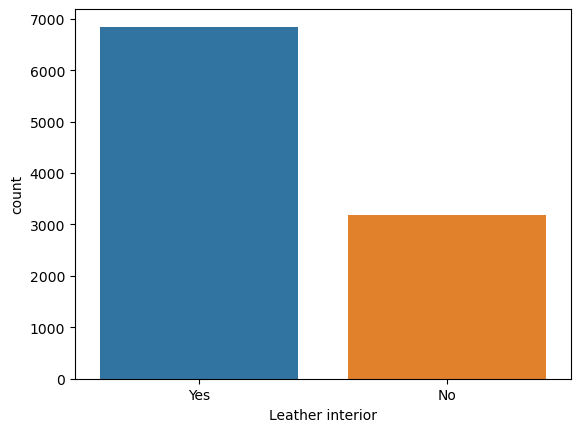

In [60]:
sns.countplot(x = df['Leather interior'])
plt.show()

In [101]:
data = {'Yes': (df['Leather interior'] == 'Yes').sum(), 'No' : (df['Leather interior'] == 'No').sum()}

In [104]:
leathers = list(data.keys())
values = list(data.values())

In [100]:
(df['Leather interior'] == 'No').sum()

3182

In [148]:
si = int((df['Leather interior'] == 'Yes').sum())

In [149]:
type(si)

int

In [150]:
si

6846

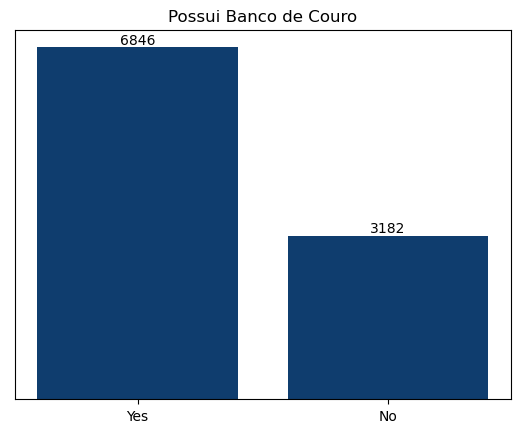

In [138]:

plt.bar(leathers, values, width = 0.8, color = '#0F3D6E')
plt.title("Possui Banco de Couro")
plt.yticks([])


for i in range(len(leathers)):
    plt.text(leathers[i], values[i], str(values[i]), ha='center', va='bottom')


plt.show()

In [ ]:
df.Airbags.value_counts()

In [ ]:
#Agrupamento da variável airbags
airbag_bins = [0,1,4,6,9,999990]
label_airbag = ["0","01-03","04","06-09","10+"]
df['Airbag'] = pd.cut(df.Airbags, bins = airbag_bins , labels = label_airbag, right = False)

In [ ]:
df.Airbag.value_counts()

In [ ]:
df.to_excel('df_projeto_flai_car_dataset.xlsx')